In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# 读取数据
data = pd.read_csv('dataset/NBA_Season_Stats.csv')

# 数据清理：去除无关列并处理缺失值
data_cleaned = data.drop(columns=['Player', 'Tm', 'Year'])
data_cleaned = data_cleaned.dropna()

# 选择用于分类的特征（根据重要性排名）
selected_features = ['AST', 'TRB', 'MP', 'DRB', 'ORB', 'STL', 'BLK', 'FG%', 'eFG%', 'PF', 'TOV', 'PTS', '2P%', 'G', '3P%', 'Age', 'FT%']

X = data_cleaned[selected_features]
y = data_cleaned['Pos']

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 标签编码
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 训练MLP模型
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# 预测
y_pred = mlp.predict(X_test)

# 输出结果
Accuracy = mlp.score(X_test, y_test)
print('Accuracy:', Accuracy)
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6709072648141948
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.63       393
           1       0.63      0.58      0.60       605
           2       0.83      0.86      0.84       713
           3       0.61      0.59      0.60       643
           4       0.60      0.66      0.63       633

    accuracy                           0.67      2987
   macro avg       0.66      0.66      0.66      2987
weighted avg       0.67      0.67      0.67      2987



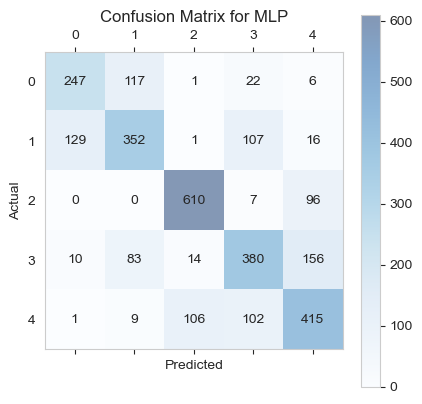

In [4]:
# 绘制混淆矩阵
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap='Blues', alpha=0.5)
plt.colorbar()
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
# 显示每个单元格的数值
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
        
plt.show()

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# 读取数据
data = pd.read_csv('dataset/NBA_Season_Stats.csv')

# 数据清理：去除无关列并处理缺失值
data_cleaned = data.drop(columns=['Player', 'Tm', 'Year'])
data_cleaned = data_cleaned.dropna()

# 选择用于分类的特征（根据重要性排名）
selected_features = ['AST', 'TRB', 'MP', 'DRB', 'ORB', 'STL', 'BLK', 'FG%', 'eFG%', 'PF', 'TOV', 'PTS', '2P%', 'G', '3P%', 'Age', 'FT%']

X = data_cleaned[selected_features]
y = data_cleaned['Pos']

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 标签编码
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 训练MLP模型，添加正则化、学习率调整和提前终止策略
mlp = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.0001, learning_rate='adaptive', early_stopping=False, max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# 预测
y_pred = mlp.predict(X_test)

# 输出结果
accuracy = mlp.score(X_test, y_test)
print('Accuracy:', accuracy)
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6709072648141948
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.63       393
           1       0.63      0.58      0.60       605
           2       0.83      0.86      0.84       713
           3       0.61      0.59      0.60       643
           4       0.60      0.66      0.63       633

    accuracy                           0.67      2987
   macro avg       0.66      0.66      0.66      2987
weighted avg       0.67      0.67      0.67      2987



In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# 读取数据
data = pd.read_csv('dataset/NBA_Season_Stats.csv')

# 数据清理：去除无关列并处理缺失值
data_cleaned = data.drop(columns=['Player', 'Tm', 'Year'])
data_cleaned = data_cleaned.dropna()

# 选择用于分类的特征（根据重要性排名）
selected_features = ['AST', 'TRB', 'MP', 'DRB', 'ORB', 'STL', 'BLK', 'FG%', 'eFG%', 'PF', 'TOV', 'PTS', '2P%', 'G', '3P%', 'Age', 'FT%']

X = data_cleaned[selected_features]
y = data_cleaned['Pos']

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 标签编码
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 定义基础模型
mlp = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.0001, learning_rate='adaptive', early_stopping=True, max_iter=500, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 定义投票分类器
voting_clf = VotingClassifier(estimators=[
    ('mlp', mlp),
    ('rf', rf),
    ('gb', gb)
], voting='soft')  # 'soft' 表示基于概率投票

# 训练投票分类器
voting_clf.fit(X_train, y_train)

# 预测
y_pred = voting_clf.predict(X_test)

# 输出结果
accuracy = voting_clf.score(X_test, y_test)
print('Accuracy:', accuracy)
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6739203213927017
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.60      0.64       393
           1       0.62      0.61      0.62       605
           2       0.84      0.86      0.85       713
           3       0.61      0.58      0.60       643
           4       0.59      0.66      0.62       633

    accuracy                           0.67      2987
   macro avg       0.67      0.66      0.67      2987
weighted avg       0.67      0.67      0.67      2987



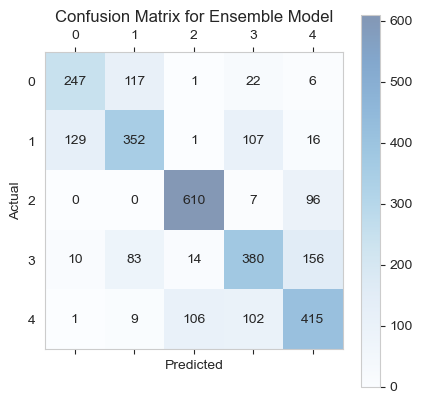

In [5]:
# 绘制混淆矩阵
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap='Blues', alpha=0.5)
plt.colorbar()
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
# 显示每个单元格的数值
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
plt.show()

1. Simple MLP model for NBA player position prediction:
```
Accuracy: 0.6709072648141948
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.63       393
           1       0.63      0.58      0.60       605
           2       0.83      0.86      0.84       713
           3       0.61      0.59      0.60       643
           4       0.60      0.66      0.63       633

    accuracy                           0.67      2987
   macro avg       0.66      0.66      0.66      2987
weighted avg       0.67      0.67      0.67      2987
```

2. Ensemble model(Voting Classifier with MLP, Random Forest, Gradient Boosting) for NBA player position prediction:
```
Accuracy: 0.6739203213927017
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.60      0.64       393
           1       0.62      0.61      0.62       605
           2       0.84      0.86      0.85       713
           3       0.61      0.58      0.60       643
           4       0.59      0.66      0.62       633

    accuracy                           0.67      2987
   macro avg       0.67      0.66      0.67      2987
weighted avg       0.67      0.67      0.67      2987
```